In [ ]:
import pandas as pd
data=pd.read_csv("StudentPerformanceFactors.csv")
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
data.shape

(6607, 20)

In [ ]:
print(data.columns)

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
print(data.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [ ]:
data['Parental_Education_Level'].fillna(data['Parental_Education_Level'].mode()[0], inplace=True)
data['Teacher_Quality'].fillna(data['Teacher_Quality'].mode()[0], inplace=True)

In [ ]:
data['Distance_from_Home'].fillna('Unknown', inplace=True)  # Or use another appropriate method

In [ ]:
print(data.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


# 1. Descriptive Statistics
Calculate and visualize basic statistics (mean, median, mode, standard deviation) for continuous variables like Hours_Studied, Sleep_Hours, Previous_Scores, etc.


In [ ]:
print(data[['Hours_Studied', 'Sleep_Hours', 'Previous_Scores']].describe())

       Hours_Studied  Sleep_Hours  Previous_Scores
count    6607.000000   6607.00000      6607.000000
mean       19.975329      7.02906        75.070531
std         5.990594      1.46812        14.399784
min         1.000000      4.00000        50.000000
25%        16.000000      6.00000        63.000000
50%        20.000000      7.00000        75.000000
75%        24.000000      8.00000        88.000000
max        44.000000     10.00000       100.000000


Summarize categorical variables (e.g., Parental_Involvement, Access_to_Resources) to understand their distribution.

In [ ]:
print(data['Parental_Involvement'].value_counts())
print(data['Access_to_Resources'].value_counts())

Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64
Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64


In [ ]:

correlation_matrix = data[['Exam_Score', 'Hours_Studied', 'Sleep_Hours', 'Previous_Scores']].corr()
print(correlation_matrix)


                 Exam_Score  Hours_Studied  Sleep_Hours  Previous_Scores
Exam_Score         1.000000       0.445455    -0.017022         0.175079
Hours_Studied      0.445455       1.000000     0.010977         0.024846
Sleep_Hours       -0.017022       0.010977     1.000000        -0.021750
Previous_Scores    0.175079       0.024846    -0.021750         1.000000


                 Exam_Score  Hours_Studied  Sleep_Hours  Previous_Scores
Exam_Score         1.000000       0.445455    -0.017022         0.175079
Hours_Studied      0.445455       1.000000     0.010977         0.024846
Sleep_Hours       -0.017022       0.010977     1.000000        -0.021750
Previous_Scores    0.175079       0.024846    -0.021750         1.000000


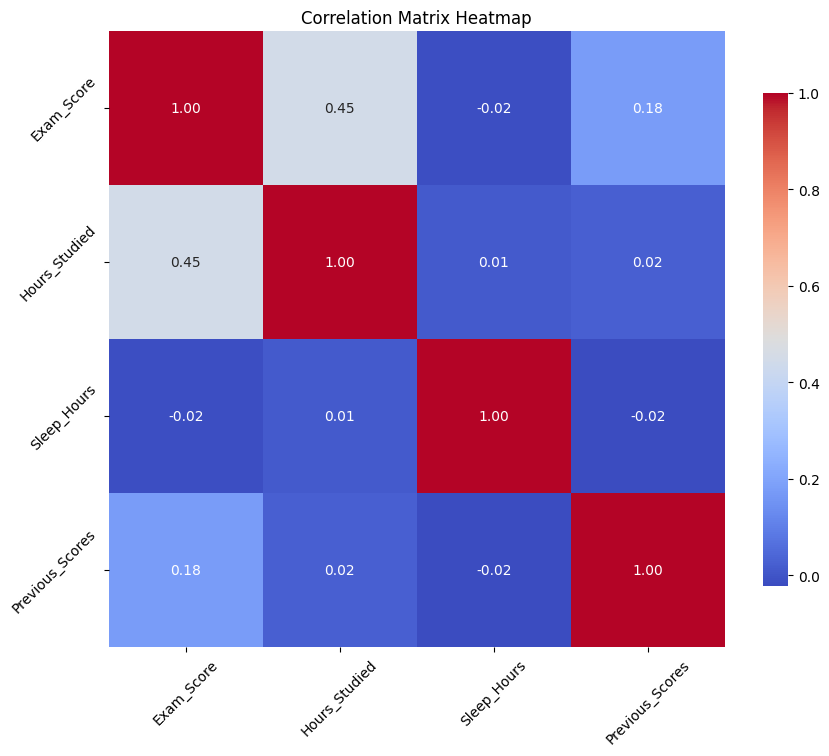

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = data[['Exam_Score', 'Hours_Studied', 'Sleep_Hours', 'Previous_Scores']].corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


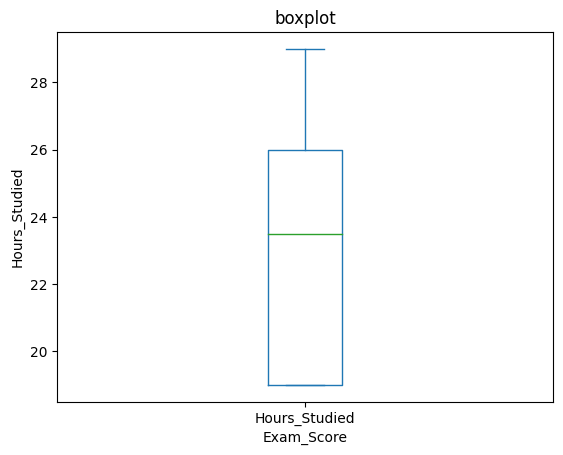

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

subset_data = data['Exam_Score'].head(8)
subset_data = data['Hours_Studied'].head(8)

subset_data.plot(kind='box')
plt.title('boxplot')
plt.xlabel('Exam_Score')
plt.ylabel('Hours_Studied')
plt.show()


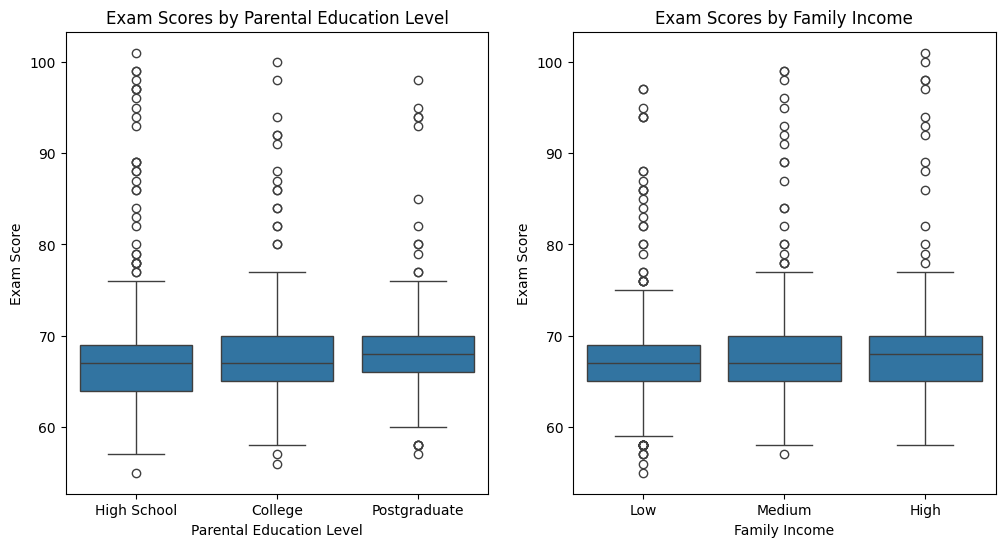

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Parental_Education_Level', y='Exam_Score', data=data)
plt.title('Exam Scores by Parental Education Level')
plt.xlabel('Parental Education Level')
plt.ylabel('Exam Score')


plt.subplot(1, 2, 2)
sns.boxplot(x='Family_Income', y='Exam_Score', data=data)
plt.title('Exam Scores by Family Income')
plt.xlabel('Family Income')
plt.ylabel('Exam Score')
plt.show()


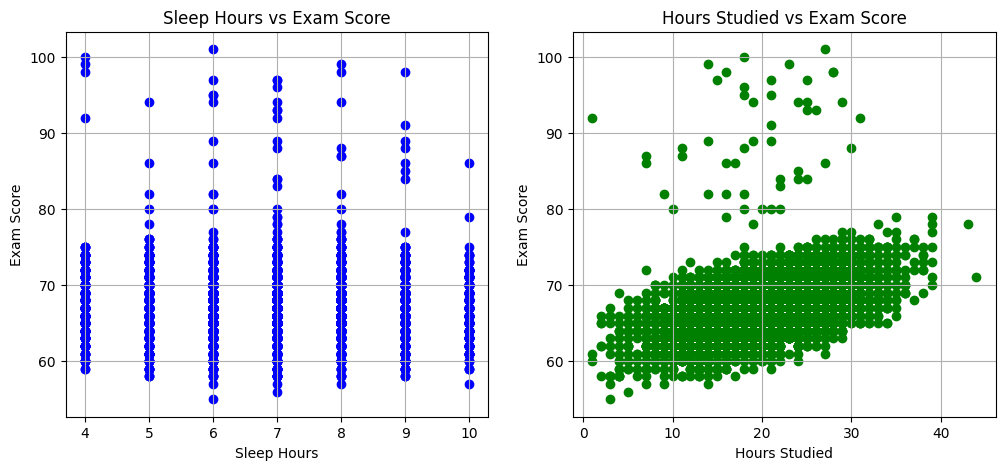

In [ ]:
#width12 and  height 5
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(data['Sleep_Hours'], data['Exam_Score'], color='blue')
plt.title('Sleep Hours vs Exam Score')
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.grid()

# Scatter plot for Hours Studied vs Exam Score
plt.subplot(1, 2, 2)
plt.scatter(data['Hours_Studied'], data['Exam_Score'], color='green')
plt.title('Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.grid()


plt.show()


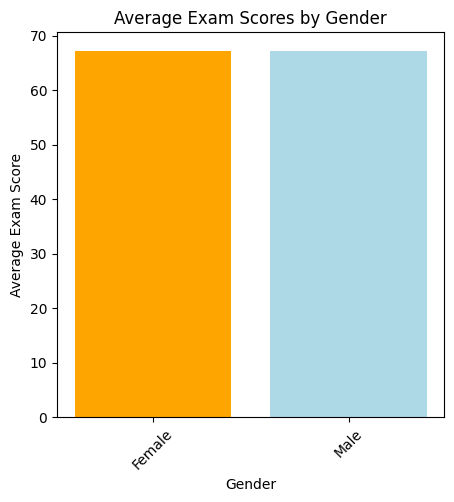

In [ ]:

average_scores_gender = data.groupby('Gender')['Exam_Score'].mean()
plt.figure(figsize=(5, 5))
plt.bar(average_scores_gender.index, average_scores_gender.values, color=['orange', 'lightblue'])
plt.title('Average Exam Scores by Gender')
plt.ylabel('Average Exam Score')
plt.xlabel('Gender')
plt.xticks(rotation=45)
plt.show()


#conclusion
The above analysis says that higher sleep hours and more study time positively impact exam scores.
